In [21]:
import pickle
import numpy
import matplotlib.pylab as plt
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")


In [4]:
with open('100_decision_time_0810_15_55.pkl', 'rb') as f:
    rt = pickle.load(f)
    
with open('pop_rate_0809_18_51.pkl', 'rb') as f:
    data_70 = pickle.load(f)


with open('low_rmp_80mV_pop_rate_0812_16_21.pkl', 'rb') as f:
    data_80 = pickle.load(f)




In [5]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)


    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B



In [6]:
def decision_time(data):
    decision_times = []
    rt = []

    for i in range(len(data)):
        
        decision_time = get_decision_time(data[i])
        
        decision_times.append(decision_time)
        rt.append(max(decision_time))
    
    return rt

            

In [7]:
rt_70 = decision_time(data_70)

In [8]:
rt_80 = decision_time(data_80)

In [11]:
def median_idx(rt):
    rt_np =  numpy.array(rt)
    rt_np_sort = rt_np.argsort()
    median_index = rt_np_sort[50]
    return median_index




In [17]:
md_idx_70 = median_idx(rt_70)

In [18]:
md_idx_80 = median_idx(rt_80)

In [16]:
def overlap_rate(data, start, end, trial_num, median_index):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.1, linewidth= 3)
        plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        #plt.plot(time, rate_mean, 'b-', label='mean_1', linewidth=0.8)

        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()


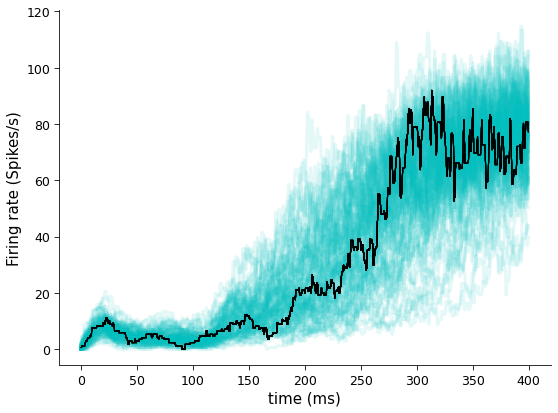

In [22]:
overlap_rate(data_70, 0, 4000, 100, md_idx_70)

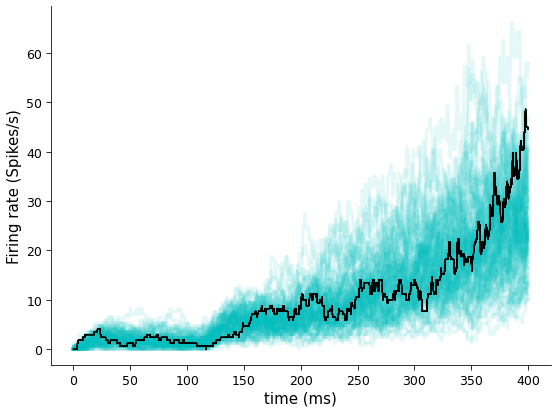

In [23]:
overlap_rate(data_80, 0, 4000, 100, md_idx_80)